In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D,GlobalAveragePooling2D,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
data_dir = r"data\train"
leaf=[]
for file in os.listdir(data_dir):
    leaf+=[file]
print(leaf)
print(len(leaf))

['Apple', 'Apple Black rot', 'Apple Cedar apple rust', 'Apple healthy', 'Blueberry healthy', 'Corn', 'Corn Gray leafspot', 'Corn healthy', 'Grape', 'Grape healthy', 'Grape Leaf blight', 'Orange Haunglongbing', 'Peach', 'Tomato']
14


In [8]:
img_height,img_width=256,256
batch_size=20

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 12456 images belonging to 14 classes.
Found 5329 images belonging to 14 classes.


In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height,img_width,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(14, activation = "softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                 

In [11]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
hist=model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
623/623 [==============================] - 1909s 3s/step - loss: 1.0374 - accuracy: 0.5694 - val_loss: 0.6130 - val_accuracy: 0.6634
Epoch 2/10
623/623 [==============================] - 1888s 3s/step - loss: 0.5712 - accuracy: 0.6859 - val_loss: 0.5847 - val_accuracy: 0.6420
Epoch 3/10
623/623 [==============================] - 1813s 3s/step - loss: 0.4638 - accuracy: 0.7160 - val_loss: 0.5793 - val_accuracy: 0.6178
Epoch 4/10
623/623 [==============================] - 1811s 3s/step - loss: 0.4435 - accuracy: 0.7260 - val_loss: 0.5643 - val_accuracy: 0.6527
Epoch 5/10
623/623 [==============================] - 1806s 3s/step - loss: 0.4495 - accuracy: 0.7274 - val_loss: 0.6675 - val_accuracy: 0.6497
Epoch 6/10
623/623 [==============================] - 1811s 3s/step - loss: 0.4267 - accuracy: 0.7431 - val_loss: 0.6342 - val_accuracy: 0.5973
Epoch 7/10
623/623 [==============================] - 1803s 3s/step - loss: 0.3900 - accuracy: 0.7584 - val_loss: 0.6405 - val_accuracy:

In [12]:
model.save("alg/cnn.h5")

C:\Users\0618\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


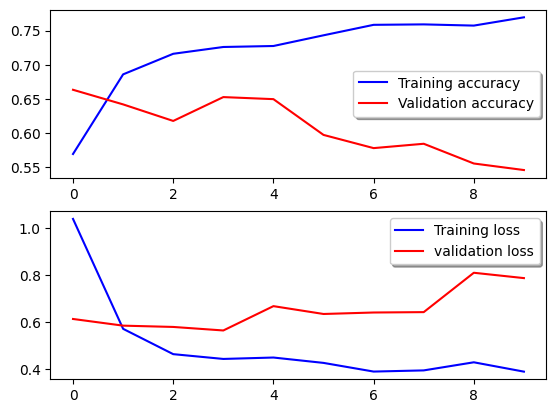

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss")
legend = ax[1].legend(loc='best', shadow=True)